In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [2]:
caloriesData = pd.read_csv("calories.csv")
excerciseData = pd.read_csv("exercise.csv")

In [3]:
caloriesData.shape

(15000, 2)

In [4]:
caloriesData.columns

Index(['User_ID', 'Calories'], dtype='object')

In [5]:
caloriesData.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [6]:
caloriesData.tail()

,User_ID,Calories
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0
14999,11751526,98.0


In [7]:
caloriesData.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [8]:
caloriesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User_ID   15000 non-null  int64  
 1   Calories  15000 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 234.5 KB


In [9]:
excerciseData.shape

(15000, 8)

In [10]:
excerciseData.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [11]:
excerciseData.tail()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,11751526,male,63,173.0,79.0,18.0,92.0,40.5


In [12]:
excerciseData.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [13]:
excerciseData.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [14]:
excerciseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 937.6+ KB


In [15]:
#combining two data frames
combo = pd.concat([caloriesData['Calories'], excerciseData], axis=1)

In [16]:
combo.shape

(15000, 9)

In [17]:
combo.head()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [18]:
combo.tail()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
14995,45.0,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,23.0,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,75.0,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,11.0,18643037,male,78,193.0,97.0,2.0,84.0,38.3
14999,98.0,11751526,male,63,173.0,79.0,18.0,92.0,40.5


In [19]:
combo.describe()

,Calories,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,89.539533,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,62.456978,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000000,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,35.000000,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,79.000000,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,138.000000,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,314.000000,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


**Data Visualization:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


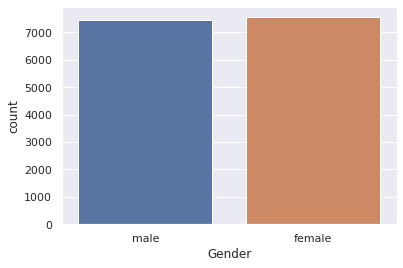

In [20]:
#gender column in countlpot. Countplot is used for categorical variables, not quantitaitive
sns.set_theme(style="darkgrid")
sns.countplot(combo['Gender'])

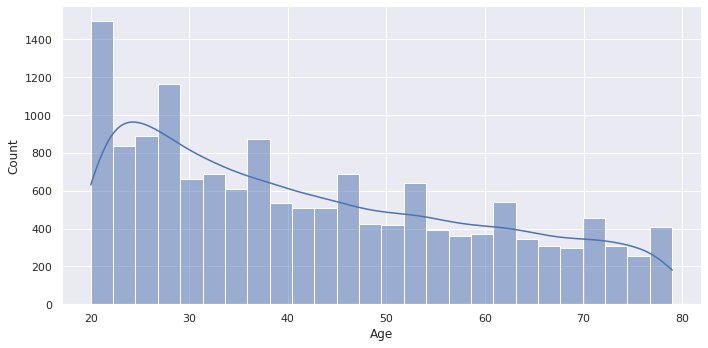

In [21]:
#if we need graph for age, we have to use different type of graph
#I want to see the distribution of age column
sns.displot(data = combo, x = combo['Age'], kde = True, aspect = 2)

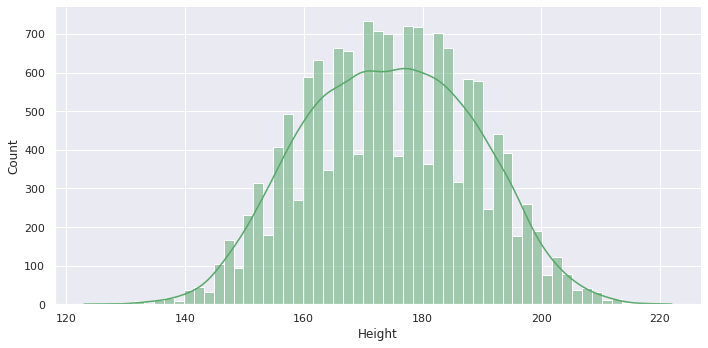

In [22]:
#finding distribution for height
sns.displot(data = combo, x = combo['Height'], kde = True, aspect = 2, color='g')

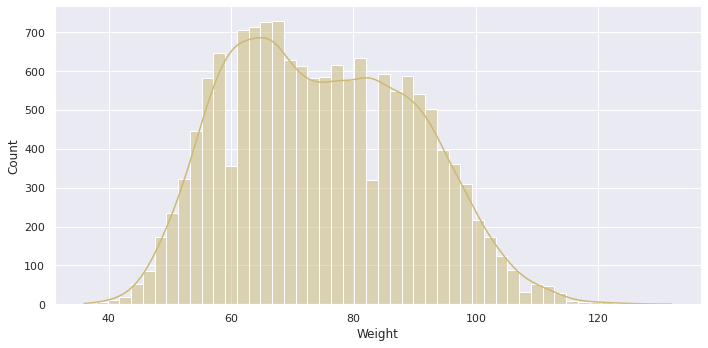

In [23]:
#distribution of weight
sns.displot(data = combo, x = combo['Weight'], kde = True, aspect = 2, color='y')

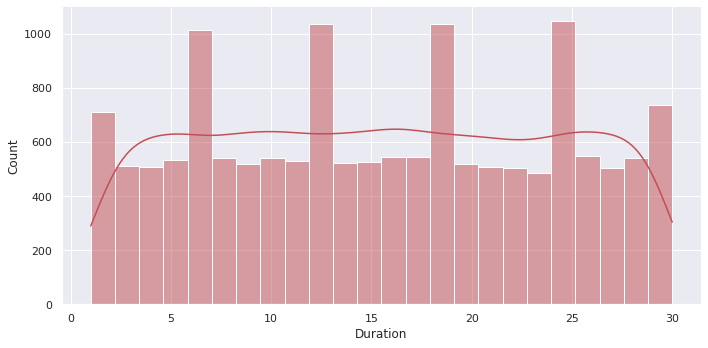

In [24]:
#distribution of duration
sns.displot(data = combo, x = combo['Duration'], kde = True, aspect = 2, color='r')

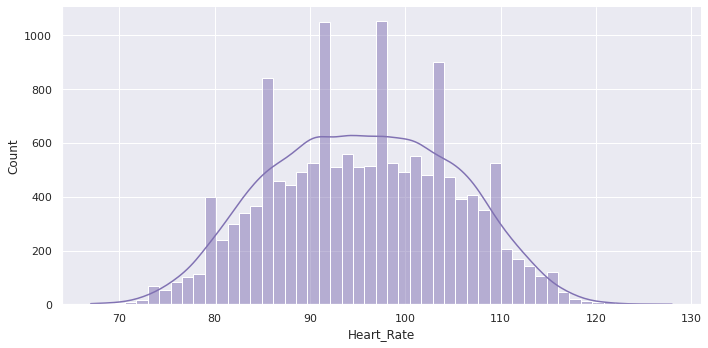

In [25]:
#distribution of heart rate
sns.displot(data = combo, x = combo['Heart_Rate'], kde = True, aspect = 2, color='m')

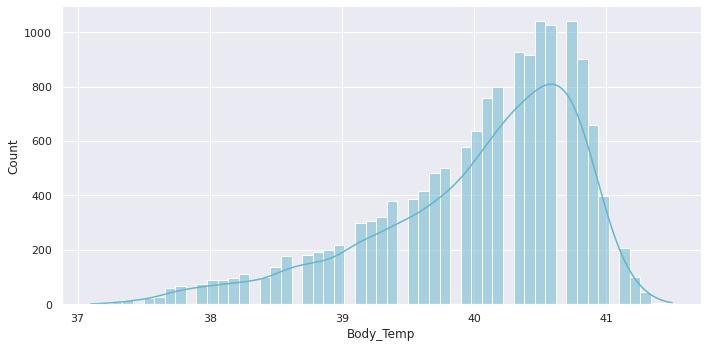

In [26]:
sns.displot(data = combo, x = combo['Body_Temp'], kde = True, aspect = 2, color='c')

**Finding correlations between data:**

In [27]:
#positive correlation -> when duration increases, calories increases
#negative correlation -> duration decreases when age increases

correlation = combo.corr()

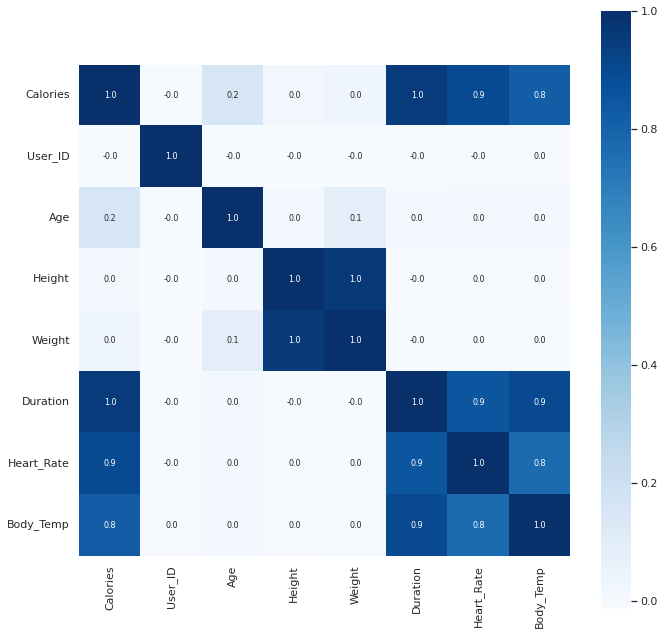

In [28]:
#heat map to better understand correlation
plt.figure(figsize=(11,11))
#fmt defines how many decimal places
#lack of annot does not give values
#cmap defines color
#cbar draws a colorbar
sns.heatmap(data = correlation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [29]:
#dark blue -> strong correlation
#lighter blue -> weaker correlation

In [30]:
#gender variable is not numerical, so we need to replace this with numeric
#0 for males, and 1 for women

#conversion text data to numerical values

In [31]:
combo.replace({'Gender':{'male':0, 'female':1}}, inplace=True)

In [32]:
combo.head()

,Calories,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,14733363,0,68,190.0,94.0,29.0,105.0,40.8
1,66.0,14861698,1,20,166.0,60.0,14.0,94.0,40.3
2,26.0,11179863,0,69,179.0,79.0,5.0,88.0,38.7
3,71.0,16180408,1,34,179.0,71.0,13.0,100.0,40.5
4,35.0,17771927,1,27,154.0,58.0,10.0,81.0,39.8


Seperate features  (all variables) and Target(calories)

In [33]:
#we drop user_id and calories; axis=1 -> columns
X = combo.drop(columns=['User_ID', 'Calories'], axis = 1)
Y = combo['Calories'] #target

we removed calories from dataset to store it in seperate variable,
Removal of user_id is bcs it is not needed fir further analysis

In [34]:
print(X) #entire dataset without calories and user_id

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [35]:
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [36]:
#print(Y) - #contains only value for calories, it's our target

Splitting into training and testing

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
print(X.shape, x_train.shape, x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


Model Training

XGBoost Regressor

In [39]:
#loading the model
model = XGBRegressor()

In [40]:
#training the model with x_train
model.fit(x_train, y_train)

[20:07:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

Prediction on Test Data

In [41]:
test_data_prediction = model.predict(x_test)

In [42]:
print(test_data_prediction ) #values of calories burnt predicted by model


[129.06204  223.79721   39.181965 ... 145.59767   22.53474   92.29064 ]


now we need to compare original values of calories burnt(y_test) with predicted ones(test_data_prediction).
Thus we use Mean Absolute Error

Mean Absolute Error - difference between actual and predicted calories burnt

In [44]:
mae = metrics.mean_absolute_error(y_test, test_data_prediction)

In [45]:
print('Mean Absolute Error = ', mae)

Mean Absolute Error =  2.7159012502233186
